In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input, Dropout, LSTM
from tensorflow.keras.layers import Bidirectional,BatchNormalization
from tensorflow.keras.layers import PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.utils import resample
from tensorflow.keras.utils import plot_model

In [9]:
EEG = pd.read_csv("EEG.csv", low_memory=False)

In [3]:
to_drop2 = ['Unnamed: 0', 'obs', ' time', ' Attention', ' Meditation', ' Derived']
EEG.drop(to_drop2, axis=1, inplace=True)

In [4]:
y = EEG.pop('status')
X = EEG

In [5]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [6]:
X.shape

(13500, 9)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [8]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(9, 1)))
model.add(Dense(64, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=65, batch_size=64)

Epoch 1/65
148/148 [==============================] - 1s 4ms/step - loss: 0.6758 - accuracy: 0.5996 - val_loss: 0.6757 - val_accuracy: 0.5891
Epoch 2/65
148/148 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6000 - val_loss: 0.6733 - val_accuracy: 0.5891
Epoch 3/65
148/148 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5997 - val_loss: 0.6751 - val_accuracy: 0.5800
Epoch 4/65
148/148 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5989 - val_loss: 0.6718 - val_accuracy: 0.5919
Epoch 5/65
148/148 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6001 - val_loss: 0.6709 - val_accuracy: 0.5921
Epoch 6/65
148/148 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6001 - val_loss: 0.6684 - val_accuracy: 0.5960
Epoch 7/65
148/148 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6011 - val_loss: 0.6660 - val_accuracy: 0.5968
Epoch 

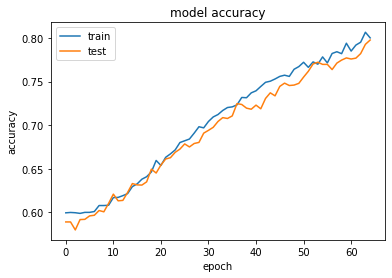

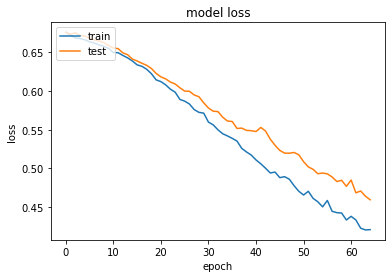

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("acc_cnn.png")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss_cnn.png")
plt.show()

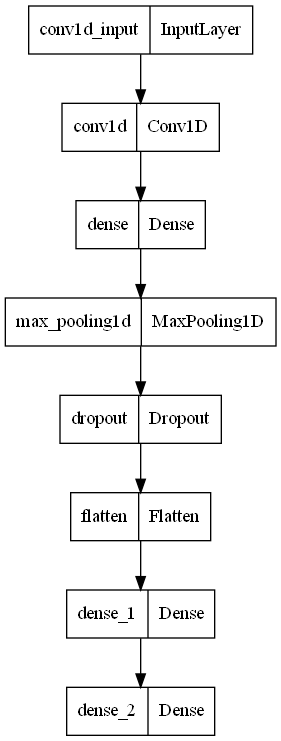

In [12]:
plot_model(model)